# Campaign for selling personal loans


This case is about a bank (Thera Bank) which has a growing customer base. Majority of these
customers are liability customers (depositors) with varying size of deposits. The number of customers
who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this
base rapidly to bring in more loan business and in the process, earn more through the interest on
loans. In particular, the management wants to explore ways of converting its liability customers to
personal loan customers (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the
retail marketing department to devise campaigns with better target marketing to increase the success
ratio with minimal budget.


The department wants to build a model that will help them identify the potential customers who have
higher probability of purchasing the loan. This will increase the success ratio while at the same time
reduce the cost of the campaign.


The file Bank.xls contains data on 5000 customers. The data include customer demographic
information (age, income, etc.), the customer&#39;s relationship with the bank (mortgage, securities
account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among
these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the
earlier campaign.

DataSet-Bank_Personal_Loan_Modelling.csv

Column Descrition - TheraBank_Column_Description.xlsx

1. Read the column description and ensure you understand each attribute well


2. Study the data distribution in each attribute, share your findings. (10 points)


3. Get the target column distribution. 


4. Split the data into training and test set in the ratio of 70:30 respectively


5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (30 points)


6. Print the confusion matrix for all the above models (10 points)


7. Give your reasoning on which is the best model in this case and why it performs better? (10 points)

# Data Coulmns Description :-	

#### ID  -                            Customer ID
#### Age      -                     Customer's age in completed years
#### Experience      -         #years of professional experience
#### Income      -                Annual income of the customer ("Dollar Symbol 000")
#### ZIPCode         -           Home Address ZIP code.
#### Family             -          Family size of the customer
#### CCAvg            -           Avg. spending on credit cards per month ("Dollar Symbol 000")
#### Education       -          Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
#### Mortgage           -       Value of house mortgage if any. ("Dollar Symbol 000")
#### Personal Loan    -      Did this customer accept the personal loan offered in the last campaign ?
#### Securities Account - Does the customer have a securities account with the bank ?
#### CD Account  -            Does the customer have a certificate of deposit (CD) account with the bank ?
#### Online          -            Does the customer use internet banking facilities ?
#### CreditCard       -         Does the customer use a credit card issued by UniversalBank ?


In [1]:
#Import all the necessary modules

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

# Importing ploting libraries
import matplotlib.pyplot as plt   

# Importing seaborn for statistical plots
import seaborn as sns

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Let us break the X and y dataframes into training set and test set. For this we need to use
# Sklearn package's data splitting function which is based on random function
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# Calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from scipy.stats import zscore
from scipy import stats

In [2]:
# Load the data from CSV file into a dataframe
colnames = ["ID" , "Age" , "Experience" , "Income" , "ZIPCode" , "Family" , "CCAvg" , "Education" , "Mortgage" , "Personal Loan" , "Securities Account" , "CD Account" , "Online" , "CreditCard"]

persloan_df = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv", names = colnames , skiprows = 1)

In [3]:
# Check the top records of the data present in dataframe
persloan_df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [4]:
# Shape of the dataframe that would tell us the number of rows and columns
print(persloan_df.shape)

(5000, 14)


In [5]:
# Info of the dataframe that would tell us datatypes of each of the columns and if any NULL is present
persloan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIPCode               5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
# Info of the dataframe that would tell us datatypes of each of the columns
persloan_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [7]:
# Set the index of the dataframe
persloan_df.index = persloan_df['ID']
persloan_df.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            4991, 4992, 4993, 4994, 4995, 4996, 4997, 4998, 4999, 5000],
           dtype='int64', name='ID', length=5000)

In [8]:
# Verifying the index that was set
persloan_df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
ID                                                                             
1    1   25           1      49    91107       4    1.6          1         0   
2    2   45          19      34    90089       3    1.5          1         0   
3    3   39          15      11    94720       1    1.0          1         0   
4    4   35           9     100    94112       1    2.7          2         0   
5    5   35           8      45    91330       4    1.0          2         0   

    Personal Loan  Securities Account  CD Account  Online  CreditCard  
ID                                                                     
1               0                   1           0       0           0  
2               0                   1           0       0           0  
3               0                   0           0       0           0  
4               0                   0           0       0           0  
5               0                   0           0       0           1

In [9]:
# High level statistics analysis 
persloan_df.describe().transpose()

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIPCode             5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

In [10]:
# Remove unwanted columns that consists customer's personal information (PI)
persloan_df.drop('ID', axis=1, inplace=True)
persloan_df.drop('ZIPCode', axis=1, inplace=True)

In [11]:
# High level statistics analysis after removing unwanted columns
persloan_df.describe().transpose()

count       mean         std   min   25%   50%    75%  \
Age                 5000.0  45.338400   11.463166  23.0  35.0  45.0   55.0   
Experience          5000.0  20.104600   11.467954  -3.0  10.0  20.0   30.0   
Income              5000.0  73.774200   46.033729   8.0  39.0  64.0   98.0   
Family              5000.0   2.396400    1.147663   1.0   1.0   2.0    3.0   
CCAvg               5000.0   1.937938    1.747659   0.0   0.7   1.5    2.5   
Education           5000.0   1.881000    0.839869   1.0   1.0   2.0    3.0   
Mortgage            5000.0  56.498800  101.713802   0.0   0.0   0.0  101.0   
Personal Loan       5000.0   0.096000    0.294621   0.0   0.0   0.0    0.0   
Securities Account  5000.0   0.104400    0.305809   0.0   0.0   0.0    0.0   
CD Account          5000.0   0.060400    0.238250   0.0   0.0   0.0    0.0   
Online              5000.0   0.596800    0.490589   0.0   0.0   1.0    1.0   
CreditCard          5000.0   0.294000    0.455637   0.0   0.0   0.0    1.0   

                      max  
Age                  67.0  
Experience           43.0  
Income              224.0  
Family                4.0  
CCAvg                10.0  
Education             3.0  
Mortgage            635.0  
Personal Loan         1.0  
Securities Account    1.0  
CD Account            1.0  
Online                1.0  
CreditCard            1.0

In [12]:
# To check for any missing data
persloan_df.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [13]:
# To check for any missing data
persloan_df.isna().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [14]:
# To check if all the data values are real or not
persloan_df[~persloan_df.applymap(np.isreal).all(1)]

Empty DataFrame
Columns: [Age, Experience, Income, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []

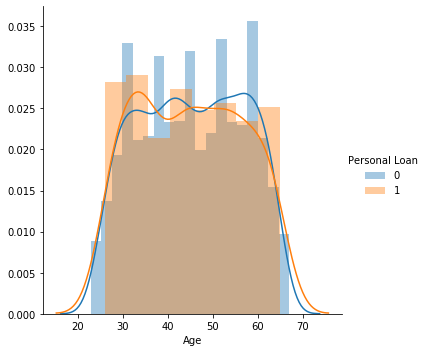

In [15]:
# Distribution plots with different columns combinations
sns.FacetGrid(persloan_df,hue="Personal Loan",height=5).map(sns.distplot,"Age").add_legend()
plt.show()

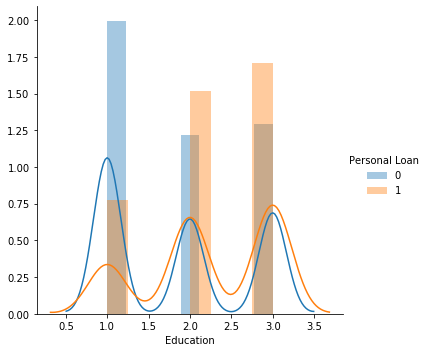

In [16]:
# Distribution plots with different columns combinations
sns.FacetGrid(persloan_df,hue="Personal Loan",height=5).map(sns.distplot,"Education").add_legend()
plt.show()

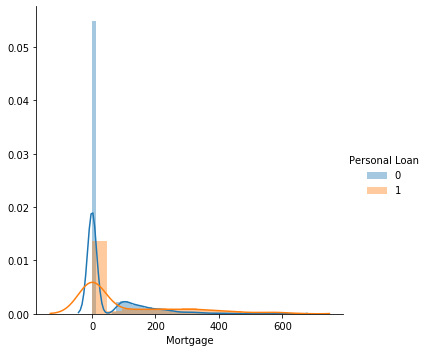

In [17]:
# Distribution plots with different columns combinations
sns.FacetGrid(persloan_df,hue="Personal Loan",height=5).map(sns.distplot,"Mortgage").add_legend()
plt.show()

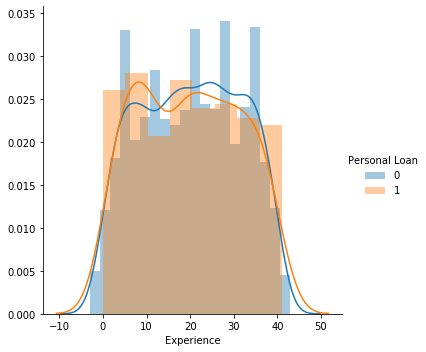

In [18]:
# Distribution plots with different columns combinations
sns.FacetGrid(persloan_df,hue="Personal Loan",height=5).map(sns.distplot,"Experience").add_legend()
plt.show()

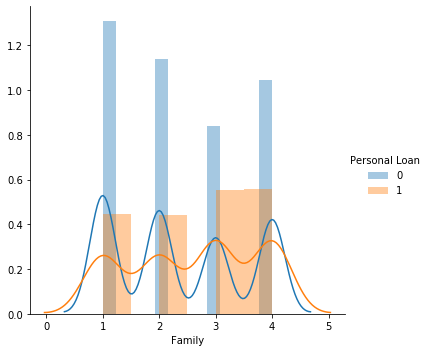

In [19]:
# Distribution plots with different columns combinations
sns.FacetGrid(persloan_df,hue="Personal Loan",height=5).map(sns.distplot,"Family").add_legend()
plt.show()

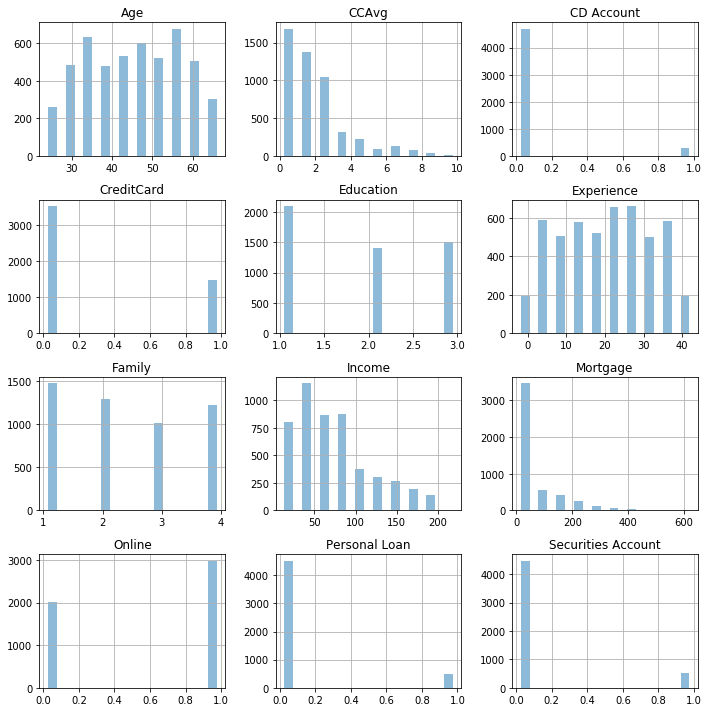

In [20]:
# Histogram plot for each of the columns
persloan_df.hist(grid=True,rwidth=0.5,alpha=0.5,figsize=(10, 10))
plt.tight_layout()
plt.show()

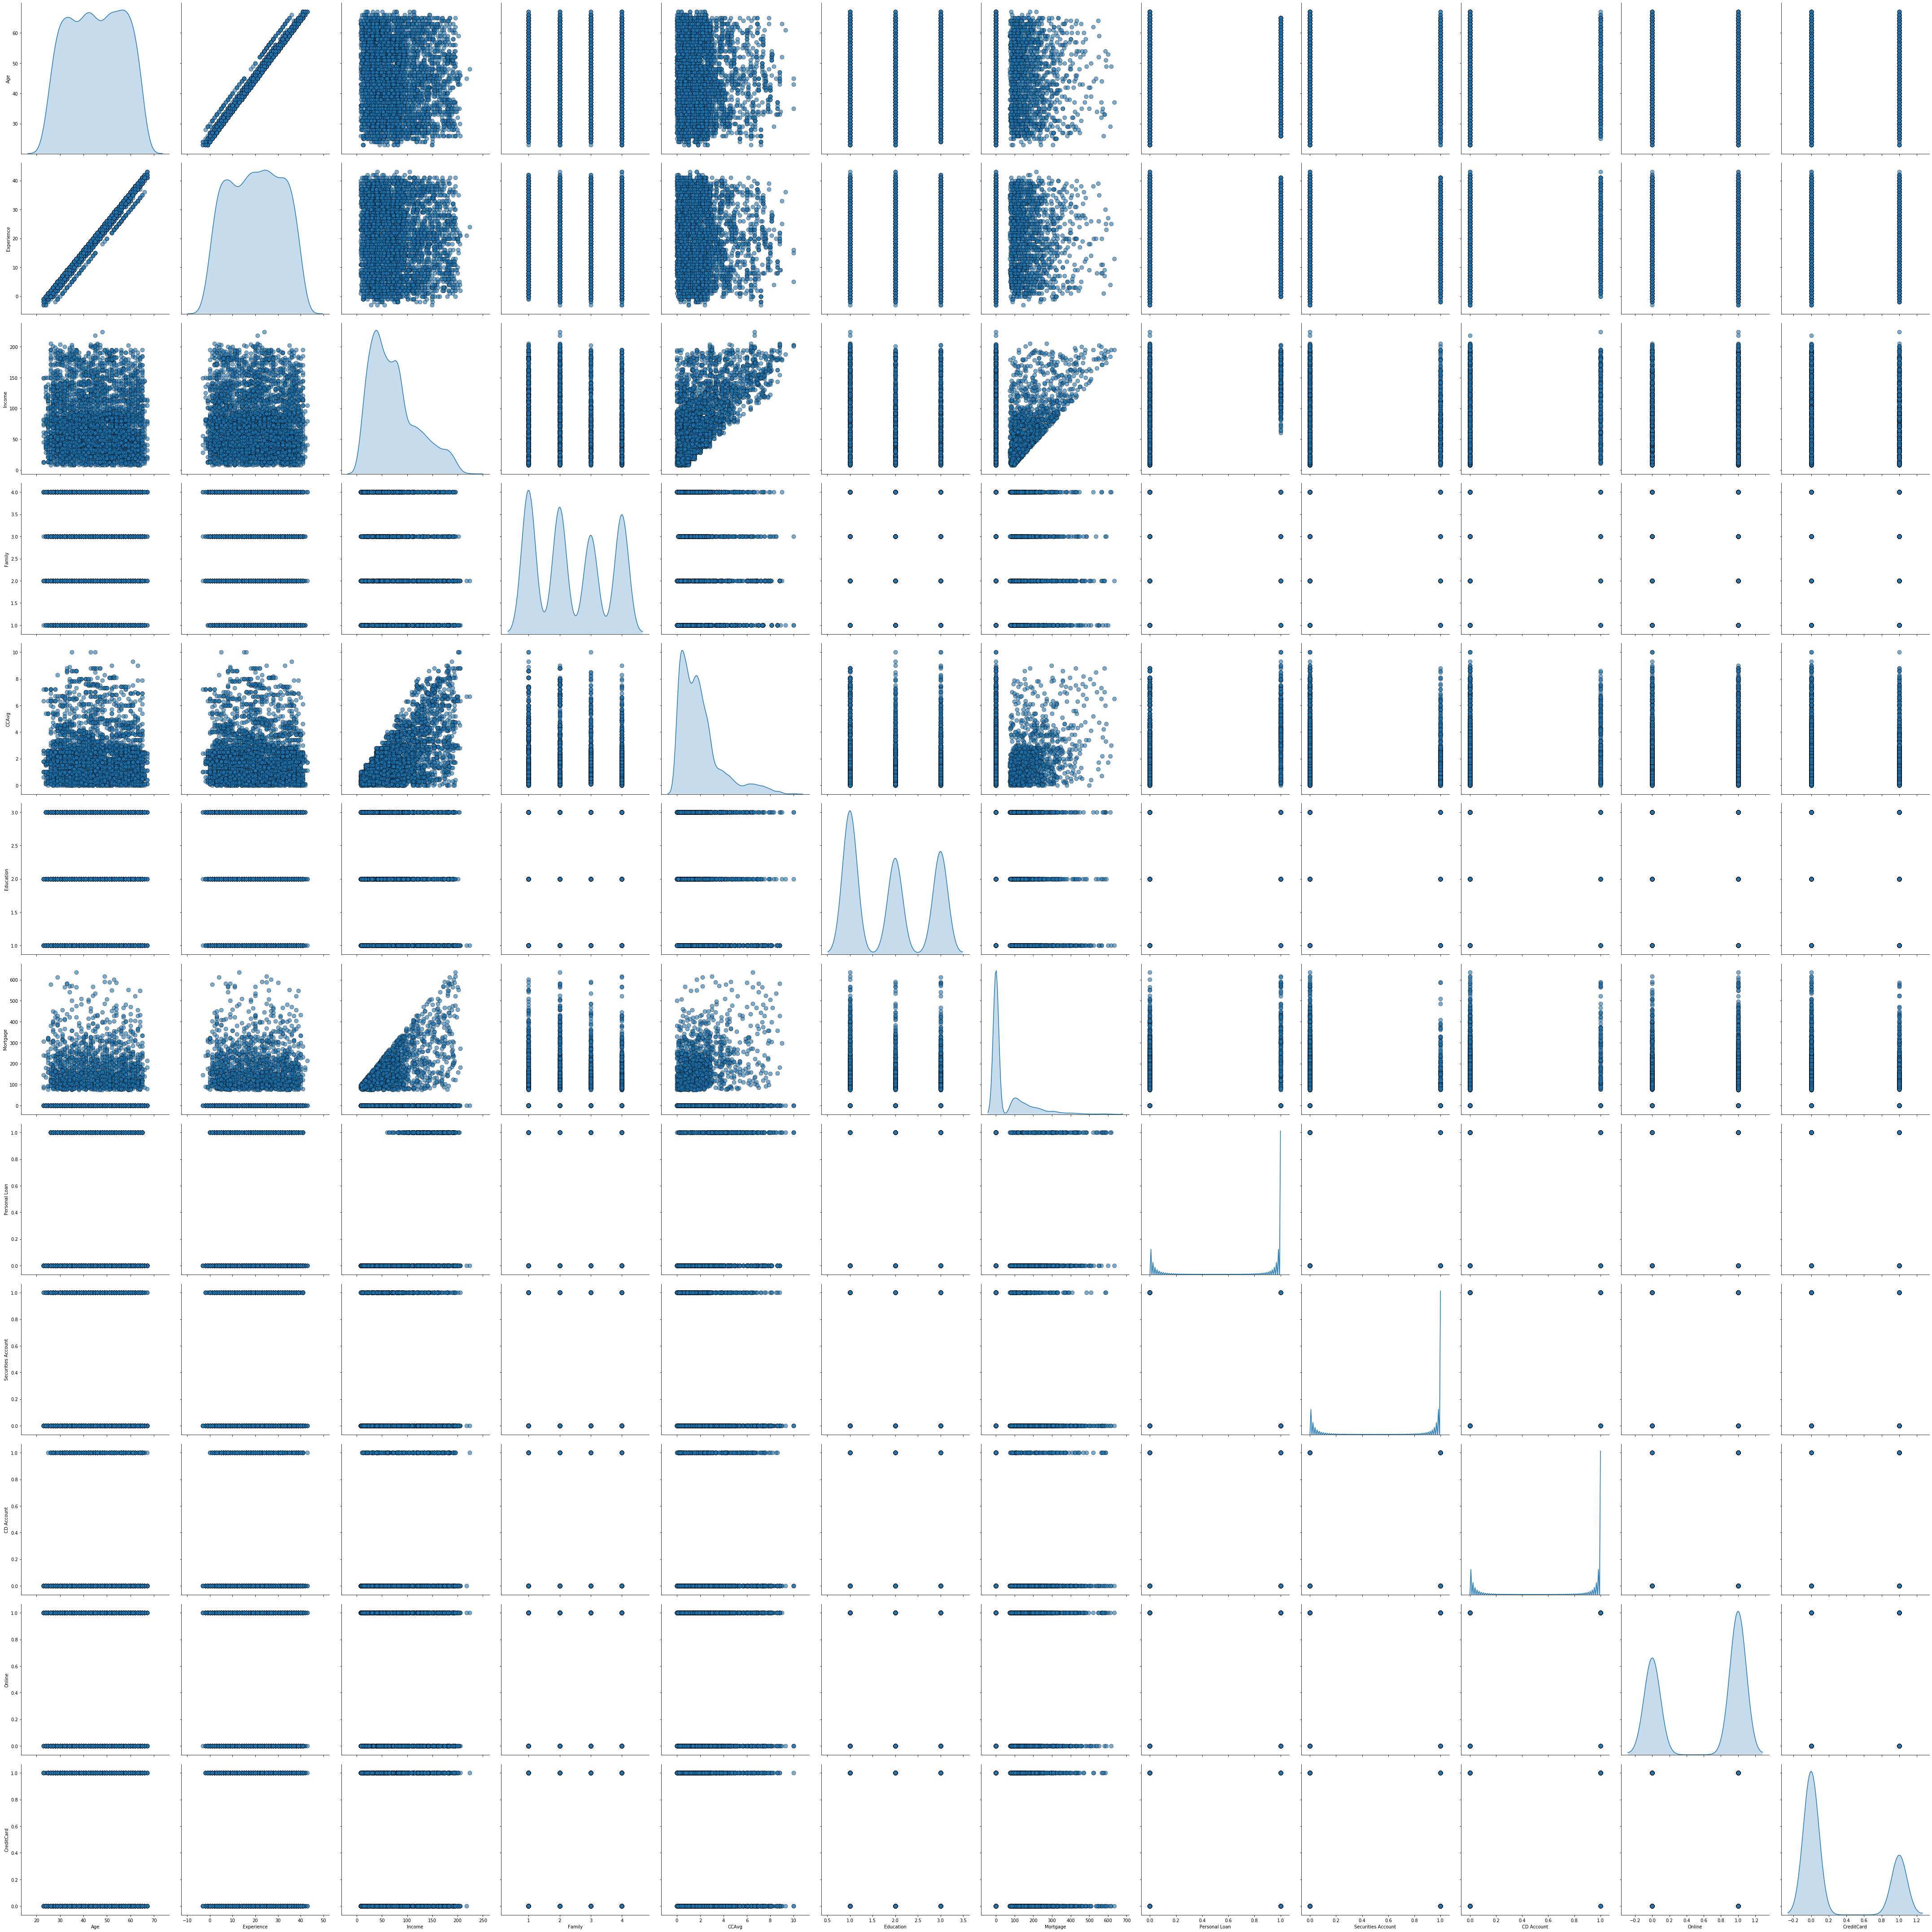

In [21]:
# Multivariate Analysis - pairplot to check all columns relations 
sns.pairplot(persloan_df, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, height=5)
plt.show()

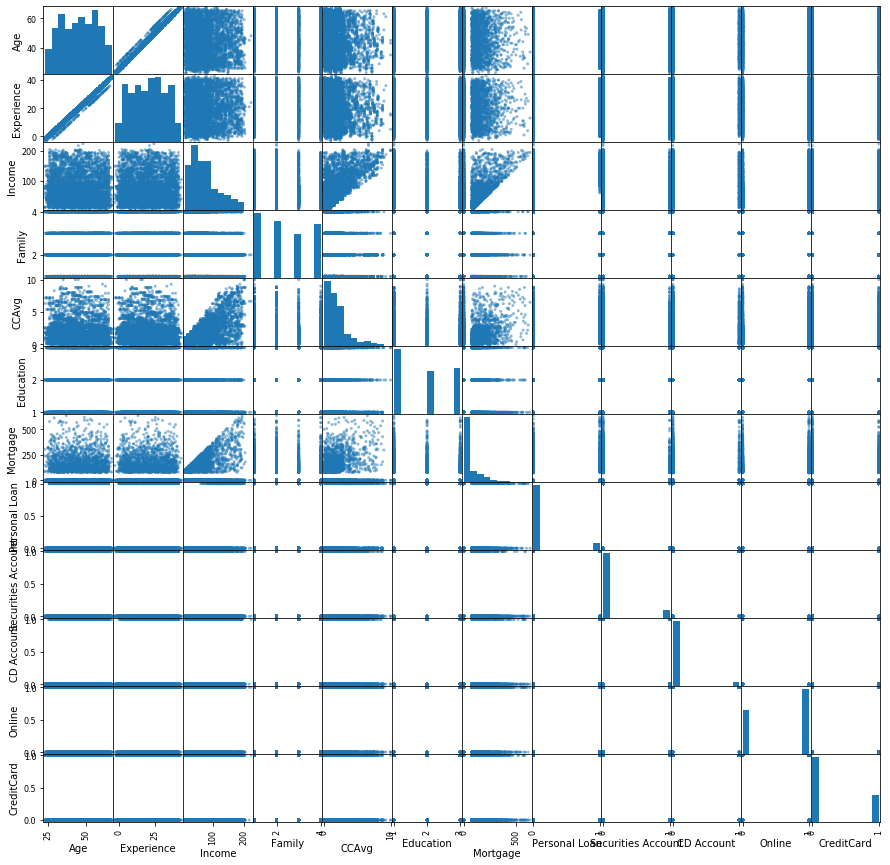

In [22]:
# Multivariate Analysis - scatter matrix to check all columns relations 
scatter_matrix(persloan_df, figsize=(15, 15))
plt.show()

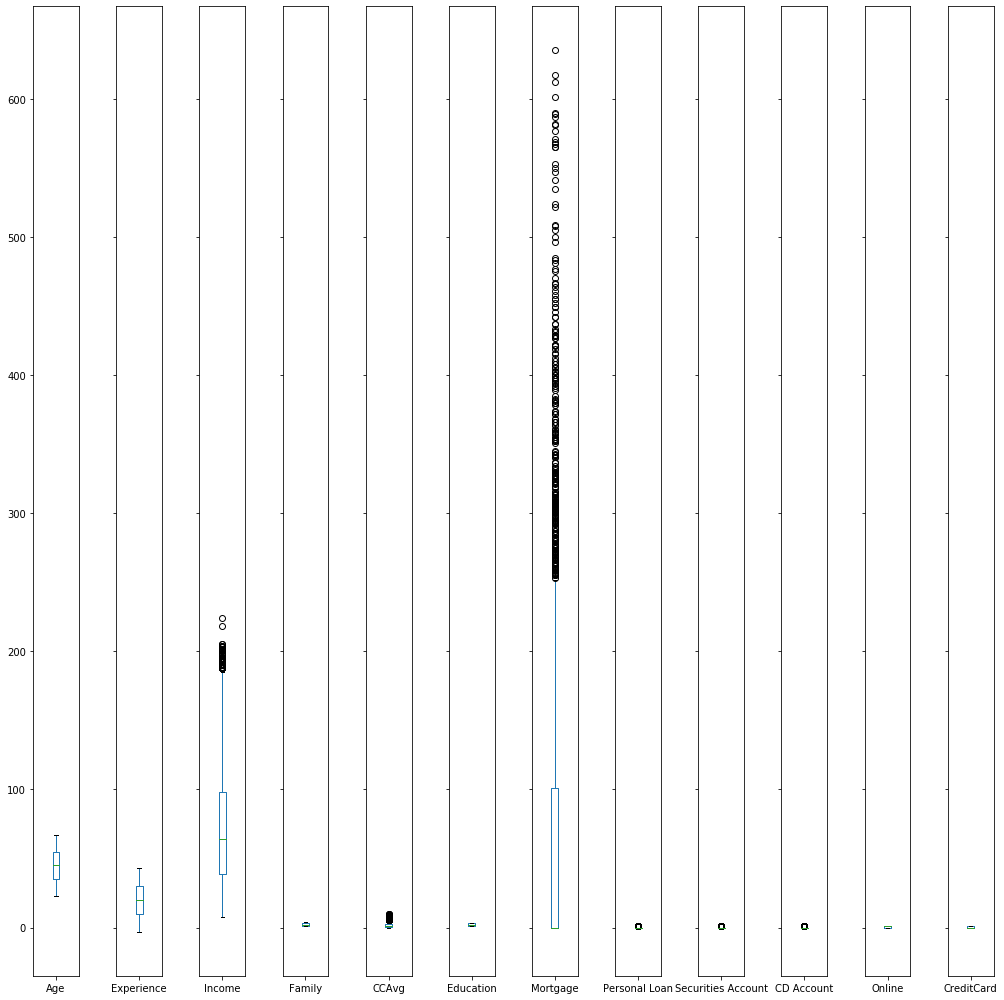

In [23]:
# Boxplot for viewing some statical values of all columns
persloan_df.plot(kind='box', subplots=True, sharex=True, sharey=True, figsize=(14, 14))
plt.tight_layout()
plt.show()

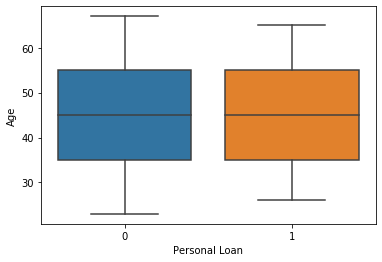

In [24]:
# Boxplot to show relation of particular column against the target column
sns.boxplot(x='Personal Loan', y='Age' , data=persloan_df)
plt.show()

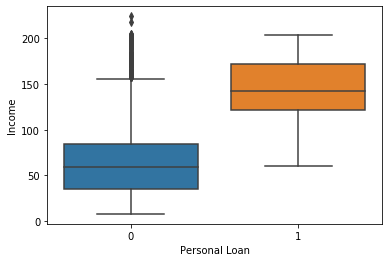

In [25]:
# Boxplot to show relation of particular column against the target column
sns.boxplot(x='Personal Loan', y='Income' , data=persloan_df)
plt.show()

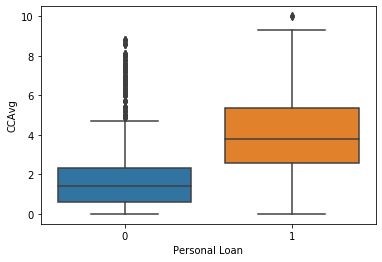

In [26]:
# Boxplot to show relation of particular column against the target column
sns.boxplot(x='Personal Loan', y='CCAvg' , data=persloan_df)
plt.show()

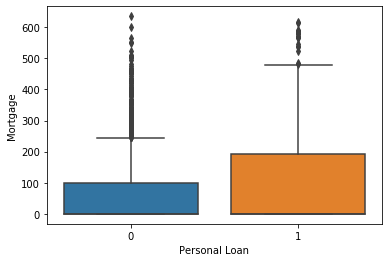

In [27]:
# Boxplot to show relation of particular column against the target column
sns.boxplot(x='Personal Loan', y='Mortgage' , data=persloan_df)
plt.show()

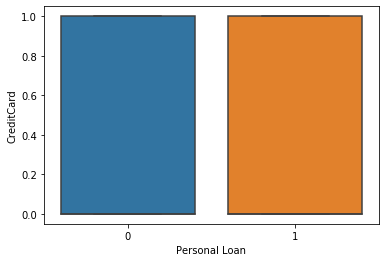

In [28]:
# Boxplot to show relation of particular column against the target column
sns.boxplot(x='Personal Loan', y='CreditCard' , data=persloan_df)
plt.show()

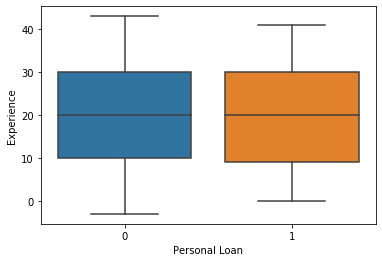

In [29]:
# Boxplot to show relation of particular column against the target column
sns.boxplot(x='Personal Loan', y='Experience' , data=persloan_df)
plt.show()

In [30]:
# Check for target variable's number of classes
persloan_df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

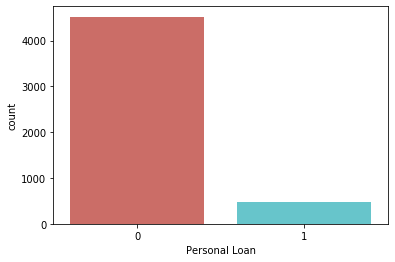

In [31]:
# Countplot to map each class
sns.countplot(x="Personal Loan", data=persloan_df, palette='hls')
plt.show()

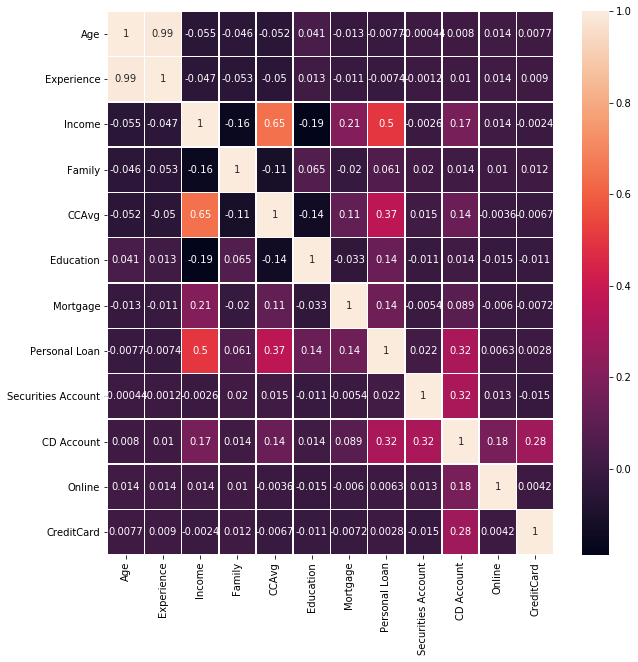

In [32]:
# To better visualize the volume of events within a dataset
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(persloan_df.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

# The "Income" and "CCAvg" columns are the driving factors of a customer going for a Personal Loan

In [33]:
# Test options and evaluation metric
seed = 9
scoring = 'accuracy'

In [34]:
# Split the data into training and test sets
y = persloan_df.pop('Personal Loan')
X = persloan_df

# Z-scored Data
zscoredX = persloan_df.apply(zscore)

# Normalized Data
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

# Standardized Data
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed)

# Prediction Using RAW DATA

In [35]:
# Shape of the test and training datasets
print ( X_train.shape , X_test.shape , y_train.shape , y_test.shape )

(3500, 11) (1500, 11) (3500,) (1500,)


In [36]:
# Viewing the test and training data
print(X)

      Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
ID                                                                  
1      25           1      49       4   1.60          1         0   
2      45          19      34       3   1.50          1         0   
3      39          15      11       1   1.00          1         0   
4      35           9     100       1   2.70          2         0   
5      35           8      45       4   1.00          2         0   
6      37          13      29       4   0.40          2       155   
7      53          27      72       2   1.50          2         0   
8      50          24      22       1   0.30          3         0   
9      35          10      81       3   0.60          2       104   
10     34           9     180       1   8.90          3         0   
11     65          39     105       4   2.40          3         0   
12     29           5      45       3   0.10          2         0   
13     48          23     114     

In [37]:
print(y)

ID
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      1
11      0
12      0
13      0
14      0
15      0
16      0
17      1
18      0
19      1
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      1
       ..
4971    0
4972    0
4973    0
4974    0
4975    0
4976    0
4977    0
4978    0
4979    0
4980    0
4981    1
4982    0
4983    0
4984    0
4985    0
4986    0
4987    0
4988    0
4989    0
4990    0
4991    0
4992    0
4993    0
4994    0
4995    0
4996    0
4997    0
4998    0
4999    0
5000    0
Name: Personal Loan, Length: 5000, dtype: int64


In [38]:
print (X_train)

      Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
ID                                                                  
476    43          19     152       3   6.10          2         0   
1305   51          26     145       1   8.10          1       397   
2077   49          23     119       1   7.30          1       398   
2045   51          25     102       1   0.30          1         0   
4473   50          25      90       1   2.80          2         0   
4797   26           0      42       4   1.30          3         0   
4168   48          24     144       4   3.50          2         0   
2641   39          13      81       2   2.80          1         0   
3569   30           4     194       2   4.50          1         0   
4600   49          25     149       2   0.40          1         0   
4311   65          41     170       4   6.10          2         0   
3309   48          23     108       2   3.80          3         0   
3097   43          18     179     

In [39]:
print (y_train)

ID
476     1
1305    0
2077    0
2045    0
4473    0
4797    0
4168    1
2641    0
3569    0
4600    0
4311    1
3309    0
3097    1
503     0
486     0
1598    0
1928    0
106     0
2914    0
908     0
3649    0
3267    0
4922    0
2318    1
2486    0
2887    0
1778    0
221     0
2456    1
480     0
       ..
960     0
3210    1
3348    0
396     0
2788    0
4025    0
2178    0
3769    0
1037    0
2941    0
831     0
3550    0
4043    0
2521    0
3260    0
239     0
957     0
3037    0
3490    1
1654    0
3833    0
2290    0
3835    0
4533    1
4674    0
1150    0
1788    0
502     0
4445    0
383     1
Name: Personal Loan, Length: 3500, dtype: int64


In [40]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = model_selection.KFold(n_splits=10, random_state=seed)
 cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

LR: 0.948857 (0.011949)
KNN: 0.906000 (0.009934)
NB: 0.882857 (0.009980)


### Now we’ll choose the best algorithm : Logistic Regression seems to be the best with the value 0.948

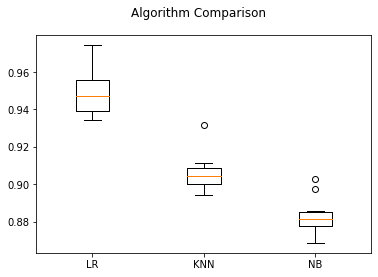

In [41]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [42]:
# Make predictions on test dataset from LogisticRegression
classifierLR = LogisticRegression(solver='liblinear', random_state=seed)
classifierLR.fit(X_train, y_train)
y_pred = classifierLR.predict(X_test)

# summarize the fit of the model
print(accuracy_score(y_test, y_pred)) 

print(classification_report(y_test, y_pred))

0.9526666666666667
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1353
           1       0.87      0.61      0.72       147

    accuracy                           0.95      1500
   macro avg       0.91      0.80      0.85      1500
weighted avg       0.95      0.95      0.95      1500



In [43]:
# Confusion Matrix calculation
cfmLR=confusion_matrix(y_test, y_pred)
print(cfmLR)

[[1339   14]
 [  57   90]]


### The Confusion Matrix result is telling us that we have 1339+90 = 1439 correct predictions and 57+14 = 71 incorrect predictions at an accuracy of 95%.

In [44]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifierLR.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


In [45]:
# Make predictions on test dataset from KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

# summarize the fit of the model
print(accuracy_score(y_test, predictions))

print(classification_report(y_test, predictions))

0.9166666666666666
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1353
           1       0.62      0.37      0.47       147

    accuracy                           0.92      1500
   macro avg       0.78      0.67      0.71      1500
weighted avg       0.90      0.92      0.91      1500



In [46]:
# Confusion Matrix calculation
cfmKNN=confusion_matrix(y_test, predictions)
print(cfmKNN)

[[1320   33]
 [  92   55]]


### The Confusion Matrix result is telling us that we have 1320+55 = 1375 correct predictions and 92+33 = 125 incorrect predictions at an accuracy of 92%.

In [47]:
print('Accuracy of KNeighbors classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of KNeighbors classifier on test set: 0.92


In [48]:
# Make predictions on test dataset from NB Gaussian
model = GaussianNB()
model.fit(X_train, y_train)
known = y_train
knownpredicted = model.predict(X_train)

# summarize the fit of the model
print(accuracy_score(known, knownpredicted))

print(classification_report(known, knownpredicted))

0.8842857142857142
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3167
           1       0.42      0.56      0.48       333

    accuracy                           0.88      3500
   macro avg       0.69      0.74      0.71      3500
weighted avg       0.90      0.88      0.89      3500



In [49]:
# Confusion Matrix calculation
cfmNB=confusion_matrix(known, knownpredicted)
print(cfmNB)

[[2907  260]
 [ 145  188]]


### The Confusion Matrix result is telling us that we have 2907+188 = 3095 correct predictions and 145+260 = 405 incorrect predictions at an accuracy of 88%.

In [50]:
print('Accuracy of Naive Bayesian classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of Naive Bayesian classifier on test set: 0.88


#### -------------------------------------------------------------------------------------------------------------------------------------------------

# Prediction Using Z-scored Data
#### # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

In [51]:
X_train,X_test,y_train,y_test = train_test_split(zscoredX,y,test_size=0.3,random_state=seed)

print(zscoredX)

           Age  Experience    Income    Family     CCAvg  Education  Mortgage  \
ID                                                                              
1    -1.774417   -1.666078 -0.538229  1.397414 -0.193385  -1.049078 -0.555524   
2    -0.029524   -0.096330 -0.864109  0.525991 -0.250611  -1.049078 -0.555524   
3    -0.552992   -0.445163 -1.363793 -1.216855 -0.536736  -1.049078 -0.555524   
4    -0.901970   -0.968413  0.569765 -1.216855  0.436091   0.141703 -0.555524   
5    -0.901970   -1.055621 -0.625130  1.397414 -0.536736   0.141703 -0.555524   
6    -0.727481   -0.619580 -0.972736  1.397414 -0.880087   0.141703  0.968512   
7     0.668434    0.601336 -0.038545 -0.345432 -0.250611   0.141703 -0.555524   
8     0.406700    0.339711 -1.124814 -1.216855 -0.937312   1.332484 -0.555524   
9    -0.901970   -0.881204  0.156983  0.525991 -0.765637   0.141703  0.467055   
10   -0.989215   -0.968413  2.307795 -1.216855  3.984049   1.332484 -0.555524   
11    1.715370    1.647835  

[5000 rows x 11 columns]


In [52]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = model_selection.KFold(n_splits=10, random_state=seed)
 cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

LR: 0.950000 (0.010936)
KNN: 0.956571 (0.012242)
NB: 0.882857 (0.009980)


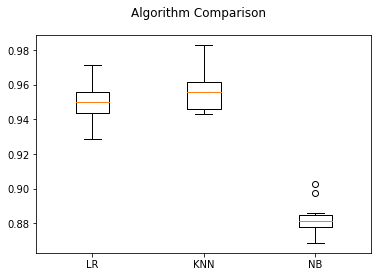

In [53]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Now we’ll choose the best algorithm : KNN Classifier seems to be the best with the value 0.956

In [54]:
# Make predictions on test dataset from LogisticRegression
classifierLR = LogisticRegression(solver='liblinear', random_state=seed)
classifierLR.fit(X_train, y_train)
y_pred = classifierLR.predict(X_test)

# summarize the fit of the model
print(accuracy_score(y_test, y_pred)) 
print('\n')
print(classification_report(y_test, y_pred))
print('\n')
cfmLR=confusion_matrix(y_test, y_pred)
print(cfmLR)
print('\n')
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifierLR.score(X_test, y_test)))

0.952


              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1353
           1       0.85      0.62      0.72       147

    accuracy                           0.95      1500
   macro avg       0.91      0.80      0.85      1500
weighted avg       0.95      0.95      0.95      1500



[[1337   16]
 [  56   91]]


Accuracy of logistic regression classifier on test set: 0.95


### The Confusion Matrix result is telling us that we have 1337+91 = 1428 correct predictions and 56+16 = 72 incorrect predictions at an accuracy of 95 %.

In [55]:
# Make predictions on test dataset from KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

# summarize the fit of the model
print(accuracy_score(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))
print('\n')
cfmKNN=confusion_matrix(y_test, predictions)
print(cfmKNN)
print('\n')
print('Accuracy of KNeighbors classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

0.9606666666666667


              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1353
           1       0.92      0.66      0.77       147

    accuracy                           0.96      1500
   macro avg       0.94      0.83      0.87      1500
weighted avg       0.96      0.96      0.96      1500



[[1344    9]
 [  50   97]]


Accuracy of KNeighbors classifier on test set: 0.96


### The Confusion Matrix result is telling us that we have 1344+97 = 1441 correct predictions and 50+9 = 59 incorrect predictions at an accuracy of 96 %.

In [56]:
# Make predictions on test dataset from NB Gaussian
model = GaussianNB()
model.fit(X_train, y_train)
known = y_train
knownpredicted = model.predict(X_train)

# summarize the fit of the model
print(accuracy_score(known, knownpredicted))
print('\n')
print(classification_report(known, knownpredicted))
print('\n')
cfmNB=confusion_matrix(known, knownpredicted)
print(cfmNB)
print('\n')
print('Accuracy of Naive Bayesian classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

0.8842857142857142


              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3167
           1       0.42      0.56      0.48       333

    accuracy                           0.88      3500
   macro avg       0.69      0.74      0.71      3500
weighted avg       0.90      0.88      0.89      3500



[[2907  260]
 [ 145  188]]


Accuracy of Naive Bayesian classifier on test set: 0.88


### The Confusion Matrix result is telling us that we have 2907+188 = 3095 correct predictions and 145+260 = 405 incorrect predictions at an accuracy of 88%.

#### -------------------------------------------------------------------------------------------------------------------------------------------------

# Prediction Using Normalized Data
#### # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

In [57]:
X_train,X_test,y_train,y_test = train_test_split(normalizedX,y,test_size=0.3,random_state=seed)

print(normalizedX)

[[0.45285991 0.0181144  0.88760542 ... 0.         0.         0.        ]
 [0.75470537 0.31865338 0.57022184 ... 0.         0.         0.        ]
 [0.90186972 0.34687297 0.25437351 ... 0.         0.         0.        ]
 ...
 [0.80801842 0.50020188 0.30781654 ... 0.         0.         0.        ]
 [0.71604969 0.44064596 0.53979131 ... 0.         0.01101615 0.        ]
 [0.31905564 0.04557938 0.94577207 ... 0.         0.01139484 0.01139484]]


In [58]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = model_selection.KFold(n_splits=10, random_state=seed)
 cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

LR: 0.904000 (0.012980)
KNN: 0.914000 (0.017955)
NB: 0.742000 (0.025073)


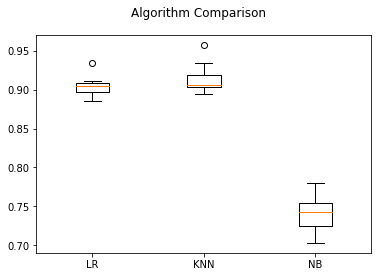

In [59]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Now we’ll choose the best algorithm : KNN Classifier seems to be the best with the value 0.914

In [60]:
# Make predictions on test dataset from LogisticRegression
classifierLR = LogisticRegression(solver='liblinear', random_state=seed)
classifierLR.fit(X_train, y_train)
y_pred = classifierLR.predict(X_test)

# summarize the fit of the model
print(accuracy_score(y_test, y_pred)) 
print('\n')
print(classification_report(y_test, y_pred))
print('\n')
cfmLR=confusion_matrix(y_test, y_pred)
print(cfmLR)
print('\n')
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifierLR.score(X_test, y_test)))

0.9046666666666666


              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1353
           1       0.83      0.03      0.07       147

    accuracy                           0.90      1500
   macro avg       0.87      0.52      0.51      1500
weighted avg       0.90      0.90      0.86      1500



[[1352    1]
 [ 142    5]]


Accuracy of logistic regression classifier on test set: 0.90


### The Confusion Matrix result is telling us that we have 1352+5 = 1357 correct predictions and 142+1 = 143 incorrect predictions at an accuracy of 90 %.

In [61]:
# Make predictions on test dataset from KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

# summarize the fit of the model
print(accuracy_score(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))
print('\n')
cfmKNN=confusion_matrix(y_test, predictions)
print(cfmKNN)
print('\n')
print('Accuracy of KNeighbors classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

0.9146666666666666


              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1353
           1       0.63      0.31      0.42       147

    accuracy                           0.91      1500
   macro avg       0.78      0.65      0.69      1500
weighted avg       0.90      0.91      0.90      1500



[[1326   27]
 [ 101   46]]


Accuracy of KNeighbors classifier on test set: 0.91


### The Confusion Matrix result is telling us that we have 1326+46 = 1372 correct predictions and 101+27 = 128 incorrect predictions at an accuracy of 91 %.

In [62]:
# Make predictions on test dataset from NB Gaussian
model = GaussianNB()
model.fit(X_train, y_train)
known = y_train
knownpredicted = model.predict(X_train)

# summarize the fit of the model
print(accuracy_score(known, knownpredicted))
print('\n')
print(classification_report(known, knownpredicted))
print('\n')
cfmNB=confusion_matrix(known, knownpredicted)
print(cfmNB)
print('\n')
print('Accuracy of Naive Bayesian classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

0.7405714285714285


              precision    recall  f1-score   support

           0       0.98      0.73      0.84      3167
           1       0.25      0.85      0.38       333

    accuracy                           0.74      3500
   macro avg       0.61      0.79      0.61      3500
weighted avg       0.91      0.74      0.79      3500



[[2308  859]
 [  49  284]]


Accuracy of Naive Bayesian classifier on test set: 0.74


### The Confusion Matrix result is telling us that we have 2308+284 = 2592 correct predictions and 49+859 = 908 incorrect predictions at an accuracy of 74%.

#### -------------------------------------------------------------------------------------------------------------------------------------------------

# Prediction Using Standardized Data
#### # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

In [63]:
X_train,X_test,y_train,y_test = train_test_split(rescaledX,y,test_size=0.3,random_state=seed)

print(rescaledX)

[[-1.77441684 -1.66607847 -0.53822878 ... -0.25354028 -1.21661774
  -0.64531434]
 [-0.02952359 -0.09633022 -0.8641094  ... -0.25354028 -1.21661774
  -0.64531434]
 [-0.55299157 -0.44516316 -1.36379301 ... -0.25354028 -1.21661774
  -0.64531434]
 ...
 [ 1.54088033  1.64783451 -1.08136314 ... -0.25354028 -1.21661774
  -0.64531434]
 [ 1.71536965  1.73504275 -0.53822878 ... -0.25354028  0.82195086
  -0.64531434]
 [-1.51268285 -1.40445376  0.20043396 ... -0.25354028  0.82195086
   1.54963239]]


In [64]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = model_selection.KFold(n_splits=10, random_state=seed)
 cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

LR: 0.950000 (0.010936)
KNN: 0.956571 (0.012242)
NB: 0.882857 (0.009980)


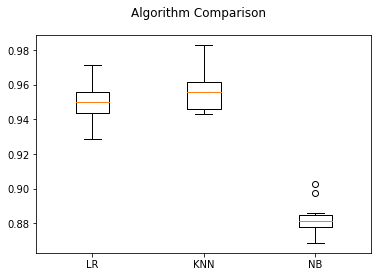

In [65]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Now we’ll choose the best algorithm : KNN Classifier seems to be the best with the value 0.956

In [66]:
# Make predictions on test dataset from LogisticRegression
classifierLR = LogisticRegression(solver='liblinear', random_state=seed)
classifierLR.fit(X_train, y_train)
y_pred = classifierLR.predict(X_test)

# summarize the fit of the model
print(accuracy_score(y_test, y_pred)) 
print('\n')
print(classification_report(y_test, y_pred))
print('\n')
cfmLR=confusion_matrix(y_test, y_pred)
print(cfmLR)
print('\n')
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifierLR.score(X_test, y_test)))

0.952


              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1353
           1       0.85      0.62      0.72       147

    accuracy                           0.95      1500
   macro avg       0.91      0.80      0.85      1500
weighted avg       0.95      0.95      0.95      1500



[[1337   16]
 [  56   91]]


Accuracy of logistic regression classifier on test set: 0.95


### The Confusion Matrix result is telling us that we have 1337+91 = 1428 correct predictions and 56+16 = 72 incorrect predictions at an accuracy of 95 %.

In [67]:
# Make predictions on test dataset from KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

# summarize the fit of the model
print(accuracy_score(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))
print('\n')
cfmKNN=confusion_matrix(y_test, predictions)
print(cfmKNN)
print('\n')
print('Accuracy of KNeighbors classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

0.9606666666666667


              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1353
           1       0.92      0.66      0.77       147

    accuracy                           0.96      1500
   macro avg       0.94      0.83      0.87      1500
weighted avg       0.96      0.96      0.96      1500



[[1344    9]
 [  50   97]]


Accuracy of KNeighbors classifier on test set: 0.96


### The Confusion Matrix result is telling us that we have 1344+97 = 1441 correct predictions and 50+9 = 59 incorrect predictions at an accuracy of 96 %.

In [68]:
# Make predictions on test dataset from NB Gaussian
model = GaussianNB()
model.fit(X_train, y_train)
known = y_train
knownpredicted = model.predict(X_train)

# summarize the fit of the model
print(accuracy_score(known, knownpredicted))
print('\n')
print(classification_report(known, knownpredicted))
print('\n')
cfmNB=confusion_matrix(known, knownpredicted)
print(cfmNB)
print('\n')
print('Accuracy of Naive Bayesian classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

0.8842857142857142


              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3167
           1       0.42      0.56      0.48       333

    accuracy                           0.88      3500
   macro avg       0.69      0.74      0.71      3500
weighted avg       0.90      0.88      0.89      3500



[[2907  260]
 [ 145  188]]


Accuracy of Naive Bayesian classifier on test set: 0.88


### The Confusion Matrix result is telling us that we have 2907+188 = 3095 correct predictions and 145+260 = 405 incorrect predictions at an accuracy of 88%.

# Targetting those segment of customers whose Income and Credit Average are High, and lower Mortgage are best suitable for the Personal Loan Campaign as they are more likely to go for it. 

# Also, K-NN Classifier Algorithm was the best among the three with highest accuracy.

In [70]:
# That's All Folks !!!